# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import scipy.linalg as la
from scipy import signal, optimize, stats
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import Image
import seaborn as sns

In [2]:
# Load the datafile
datafile = pd.read_csv('center_sternum.txt',sep='\t')

# Look what our data is like in order to select useful columns
print("The variables in our datafile are:", datafile.columns)
print("The size of our datafile is", datafile.shape)

The variables in our datafile are: Index(['Log Mode', 'Log Freq', 'Timestamp', 'AccX', 'AccY', 'AccZ', 'GyroX',
       'GyroY', 'GyroZ', 'MagnX', 'MagnY', 'MagnZ', 'qw', 'qi', 'qj', 'qk'],
      dtype='object')
The size of our datafile is (16506, 16)


### Calibration and elimination of useless columns

In [3]:
# Drop not needed columns
df = datafile.drop(['qw', 'qi', 'qj', 'qk'], axis = 1)

# Calibrate the data considering the used device
# First device cal data

gyro_offset = np.array([-2.242224,2.963463,-0.718397])

acc_calibration = np.array([[1.000966,-0.002326418,-0.0006995499],
                    [-0.002326379,0.9787045,-0.001540918],
                    [-0.0006995811,-0.001540928,1.00403]])
acc_offset = np.array([-3.929942,-13.74679,60.67546])

magn_calibration = np.array([[0.9192851,-0.02325168,0.003480837],
                   [-0.02325175,0.914876,0.004257396],
                   [0.003481006,0.004257583,0.8748001]])
magn_offset = np.array([-95.67974,-244.9142,17.71132])
'''
#Second device cal data
gyro_offset = np.array([-2.804399,1.793105,0.3411708])

acc_calibration = np.array([[1.002982,9.415505E-05,0.004346743],
                    [9.04459E-05, 1.002731,-0.001444198],
                    [0.004346536,-0.001444751,1.030587]])
acc_offset = np.array([3.602701,-20.96658,54.97186])

magn_calibration = np.array([[1.013437,-0.04728858,-0.001861475],
                   [-0.04728862,1.004832,0.008222118],
                   [-0.001861605,0.008221965,0.9439077]])
magn_offset = np.array([-150.4098,74.62431,630.9805])
'''
# Calibration
df[['GyroX','GyroY','GyroZ']] = df[['GyroX','GyroY','GyroZ']] + gyro_offset
df[['AccX','AccY','AccZ']] = np.dot(df[['AccX','AccY','AccZ']],acc_calibration.T) + acc_offset
df[['MagnX','MagnY','MagnZ']] = np.dot(df[['MagnX','MagnY','MagnZ']],magn_calibration.T) + magn_offset

#Add time column by taking time steps of 1/logFreq
df['Time'] = np.arange(0, len(df['Log Freq']))/df['Log Freq'][0]
display(df)

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,Time
0,5,200,1576222772,943.007996,410.325442,130.264244,-9.066652,-11.280817,0.686183,-502.261441,-683.404962,-141.669690,0.000
1,5,200,1576222772,965.209969,363.380701,148.635086,3.940982,-9.326617,-8.687863,-502.257960,-683.400705,-140.794890,0.005
2,5,200,1576222772,985.689106,356.065246,138.465450,9.467696,-1.998369,-8.168779,-502.257960,-683.400705,-140.794890,0.010
3,5,200,1576222772,950.852176,393.026437,148.047237,15.635636,5.482547,-6.703130,-502.207976,-685.226199,-139.928605,0.015
4,5,200,1576222772,968.040164,402.461108,159.595720,22.979146,8.368043,3.296870,-502.207976,-685.226199,-139.928605,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,954.849739,269.000099,5.047576,-0.578102,5.268807,-1.390153,-539.805161,-644.743591,-96.144764,82.505
16502,5,200,1576222847,951.006879,266.016847,9.709647,-0.761308,5.452013,-1.420687,-539.778428,-645.654210,-95.274222,82.510
16503,5,200,1576222847,963.711402,268.397270,-4.573267,-1.127720,6.337509,-1.619160,-539.778428,-645.654210,-95.274222,82.515
16504,5,200,1576222847,961.972293,278.538659,3.067677,-1.539934,6.627585,-2.306183,-540.740736,-643.796949,-94.394388,82.520


### Plotting the data

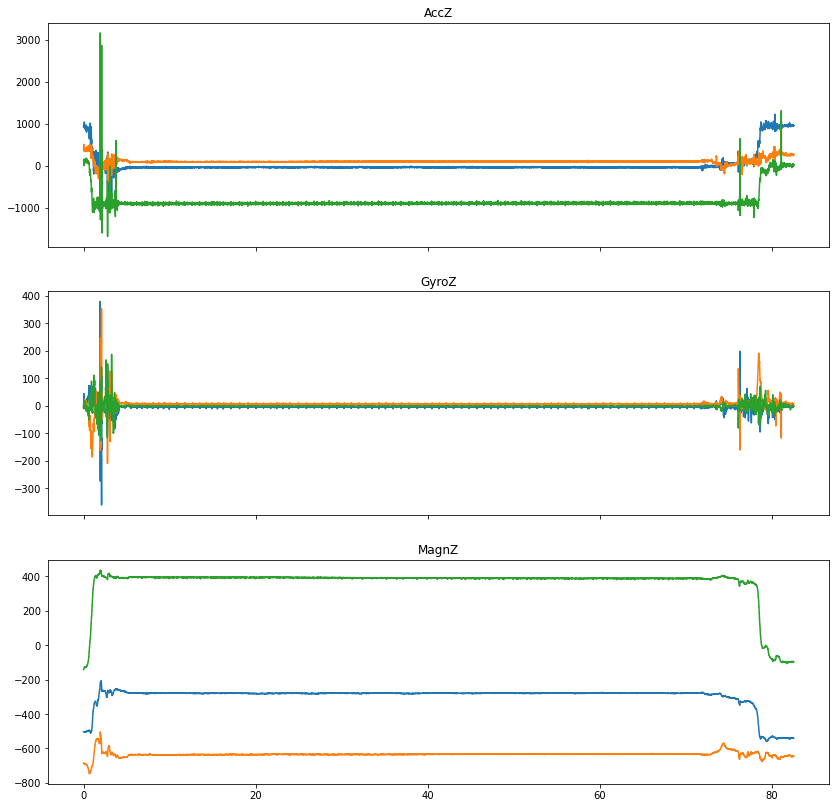

In [4]:
fig, ax = plt.subplots(3,1,figsize=(14,14), sharex=True)

ax[0].plot(df['Time'], df['AccX'])
ax[0].set_title('AccX')
ax[0].plot(df['Time'], df['AccY'])
ax[0].set_title('AccY')
ax[0].plot(df['Time'], df['AccZ'])
ax[0].set_title('AccZ')

ax[1].plot(df['Time'], df['GyroX'])
ax[1].set_title('GyroX')
ax[1].plot(df['Time'], df['GyroY'])
ax[1].set_title('GyroY')
ax[1].plot(df['Time'], df['GyroZ'])
ax[1].set_title('GyroZ')

ax[2].plot(df['Time'], df['MagnX'])
ax[2].set_title('MagnX')
ax[2].plot(df['Time'], df['MagnY'])
ax[2].set_title('MagnY')
ax[2].plot(df['Time'], df['MagnZ'])
_=ax[2].set_title('MagnZ')

### Restricting our data to the relevant time window

In [5]:
lowlimit = df['Time'][int(0.1*len(df['Time']))]
highlimit = df['Time'][int(0.85*len(df['Time']))]

# Cut the misleading rows by trimming the data based on time
df_timecut = df.loc[(df['Time'] >= lowlimit) & (df['Time'] <= highlimit)] #limit analysis to the specified time frame

# Select the columns we need for the PCA, drop the unimportant ones
df_time_frame = df_timecut.drop(['Log Mode', 'Log Freq', 'Timestamp', 'Time'], axis=1)
display(df_time_frame)

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
1650,-37.476891,102.563273,-907.655555,-4.501766,6.215371,-1.573359,-278.899995,-637.942189,393.901226
1651,-39.855996,103.053747,-912.431818,-5.539934,6.810791,-1.405420,-278.943017,-636.108179,394.784542
1652,-36.491725,105.399753,-929.035450,-6.043751,7.345143,-1.313817,-278.943017,-636.108179,394.784542
1653,-47.111798,92.350697,-890.606398,-6.089552,7.314608,-0.672595,-278.966269,-635.193303,394.788799
1654,-35.935845,96.230388,-906.972954,-6.196423,7.375677,-0.458855,-278.966269,-635.193303,394.788799
...,...,...,...,...,...,...,...,...,...
14026,-46.603314,113.623834,-904.236820,-9.524667,4.902394,-2.199313,-277.221820,-632.524980,388.684933
14027,-39.727249,109.294866,-855.912008,-11.112453,5.528349,-2.168779,-276.279283,-633.463108,388.684157
14028,-46.933633,107.748107,-848.555029,-9.371995,6.612318,-2.107710,-276.279283,-633.463108,388.684157
14029,-53.106252,109.190281,-845.306946,-6.410163,7.818425,-1.390153,-277.198568,-633.439856,388.680676


# Statistical Quantities

In [6]:
statistics = pd.DataFrame({
    'mean'  : df_time_frame.mean(),
    'median': df_time_frame.median(),
    'variance': df_time_frame.var(),
    'standard deviation': df_time_frame.std(),
    '25% percentile' : df_time_frame.quantile(q=0.25),
    '75% percentile': df_time_frame.quantile(q=0.75)}).T

print('Statistics of the data set')
display(statistics)

Statistics of the data set


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
mean,-34.313318,100.845493,-892.569491,-4.331309,6.645650,-1.584158,-278.656348,-633.691478,391.146106
median,-34.259900,100.989385,-892.968158,-4.394896,6.597051,-1.573359,-278.962788,-633.412347,391.285341
variance,49.486769,27.420896,212.043834,2.060900,0.524829,0.134298,1.448028,3.114447,6.658165
standard deviation,7.034683,5.236497,14.561725,1.435583,0.724451,0.366467,1.203340,1.764780,2.580342
25% percentile,-38.949126,97.422824,-901.281989,-4.929247,6.230639,-1.817634,-279.090603,-635.178566,388.689191
75% percentile,-29.616485,104.316631,-884.678736,-3.723140,6.963463,-1.344351,-278.046984,-632.474220,393.906260


### Standardizing the data

In [7]:
# Center the data
centered_df = (df_time_frame - statistics.iloc[0])

# Normalize the data
standardized_df = centered_df/statistics.iloc[3]

print('Standardized Data')
display(standardized_df)

Standardized Data


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
1650,-0.449711,0.328040,-1.036008,-0.118737,-0.593938,0.029470,-0.202476,-2.408635,1.067734
1651,-0.787907,0.421705,-1.364009,-0.841905,0.227953,0.487734,-0.238228,-1.369407,1.410059
1652,-0.309667,0.869715,-2.504233,-1.192854,0.965549,0.737696,-0.238228,-1.369407,1.410059
1653,-1.819340,-1.622229,0.134812,-1.224758,0.923399,2.487433,-0.257551,-0.850999,1.411709
1654,-0.230647,-0.881334,-0.989132,-1.299203,1.007696,3.070678,-0.257551,-0.850999,1.411709
...,...,...,...,...,...,...,...,...,...
14026,-1.747058,2.440246,-0.801233,-3.617594,-2.406313,-1.678607,1.192122,0.660988,-0.953817
14027,-0.769605,1.613555,2.517386,-4.723615,-1.542273,-1.595287,1.975389,0.129404,-0.954118
14028,-1.794013,1.318174,3.022613,-3.511246,-0.046010,-1.428644,1.975389,0.129404,-0.954118
14029,-2.671468,1.593582,3.245669,-1.448090,1.618846,0.529394,1.211444,0.142580,-0.955467


### Plotting Standardized Data

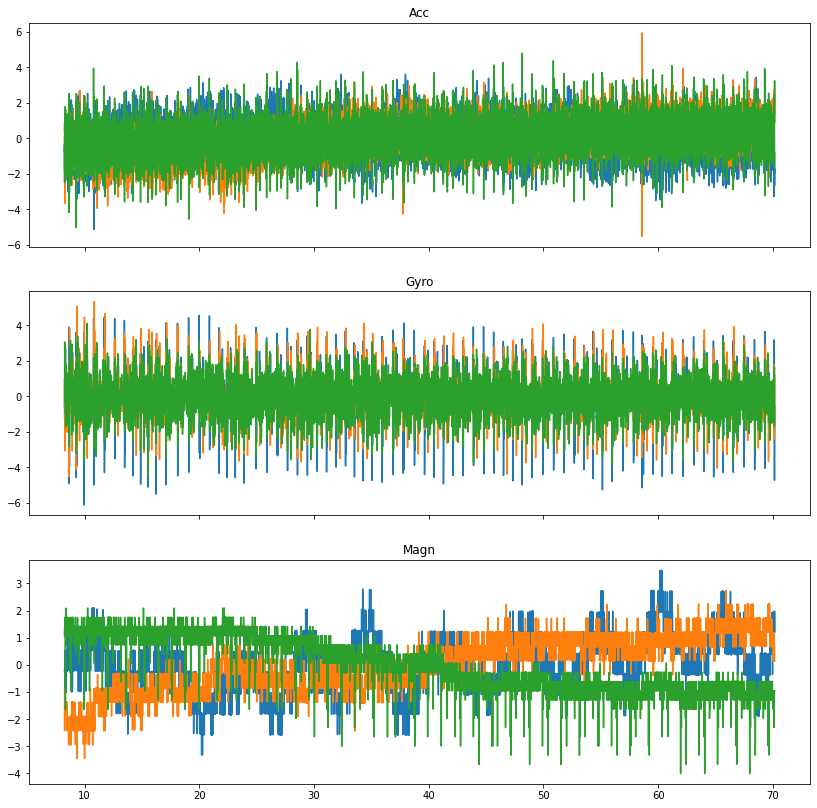

In [8]:
fig, ax = plt.subplots(3,1,figsize=(14,14), sharex=True)

ax[0].plot(df_timecut['Time'], standardized_df['AccX'])
ax[0].plot(df_timecut['Time'], standardized_df['AccY'])
ax[0].plot(df_timecut['Time'], standardized_df['AccZ'])
ax[0].set_title('Acc')

ax[1].plot(df_timecut['Time'], standardized_df['GyroX'])
ax[1].plot(df_timecut['Time'], standardized_df['GyroY'])
ax[1].plot(df_timecut['Time'], standardized_df['GyroZ'])
ax[1].set_title('Gyro')

ax[2].plot(df_timecut['Time'], standardized_df['MagnX'])
ax[2].plot(df_timecut['Time'], standardized_df['MagnY'])
ax[2].plot(df_timecut['Time'], standardized_df['MagnZ'])
_=ax[2].set_title('Magn')

# PCA

### PCA on separate components

In [9]:
acc_st = standardized_df[['AccX', 'AccY', 'AccZ']]
gyro_st = standardized_df[['GyroX', 'GyroY', 'GyroZ']]
magn_st = standardized_df[['MagnX', 'MagnY', 'MagnZ']]

In [10]:
l_acc, v_acc = la.eig(np.cov(acc_st.T))
l_acc_sum = np.sum(l_acc)
acc_var_ratios = np.array([x / l_acc_sum for x in l_acc])
print('Acc variability ratios:\n', np.sort(acc_var_ratios * 100))
print('Acc eigenvalues:\n', l_acc[np.argsort(acc_var_ratios)])
print('Acc eigenvectors:\n', v_acc[np.argsort(acc_var_ratios)])

l_gyro, v_gyro = la.eig(np.cov(gyro_st.T))
l_gyro_sum = np.sum(l_gyro)
gyro_var_ratios = np.array([x / l_gyro_sum for x in l_gyro])
print('Gyro variability ratios:\n', np.sort(gyro_var_ratios * 100))
print('Gyro eigenvalues:\n', l_gyro[np.argsort(gyro_var_ratios)])
print('Gyro eigenvectors:\n', v_gyro[np.argsort(gyro_var_ratios)])

l_magn, v_magn = la.eig(np.cov(magn_st.T))
l_magn_sum = np.sum(l_magn)
magn_var_ratios = np.array([x / l_magn_sum for x in l_magn])
print('Magn variability ratios:\n', np.sort(magn_var_ratios * 100))
print('Magn eigenvalues:\n', l_gyro[np.argsort(magn_var_ratios)])
print('Magn eigenvectors:\n', v_gyro[np.argsort(magn_var_ratios)])

Acc variability ratios:
 [19.76498751+0.j 29.46889429+0.j 50.76611821+0.j]
Acc eigenvalues:
 [0.59294963+0.j 0.88406683+0.j 1.52298355+0.j]
Acc eigenvectors:
 [[ 0.42630362  0.02488053 -0.9042379 ]
 [ 0.63694679  0.70154086  0.31959225]
 [-0.64231146  0.71219477 -0.28322183]]
Gyro variability ratios:
 [18.73201817+0.j 20.57818898+0.j 60.68979285+0.j]
Gyro eigenvalues:
 [0.56196054+0.j 0.61734567+0.j 1.82069379+0.j]
Gyro eigenvectors:
 [[ 0.58064805 -0.49653106  0.64521682]
 [ 0.5866763  -0.29430512 -0.7544504 ]
 [ 0.56449867  0.81660358  0.12041531]]
Magn variability ratios:
 [ 8.35111363+0.j 28.27666982+0.j 63.37221655+0.j]
Magn eigenvalues:
 [0.56196054+0.j 0.61734567+0.j 1.82069379+0.j]
Magn eigenvectors:
 [[ 0.58064805 -0.49653106  0.64521682]
 [ 0.5866763  -0.29430512 -0.7544504 ]
 [ 0.56449867  0.81660358  0.12041531]]


### PCA on whole dataset

In [25]:
l, v = la.eig(np.cov(standardized_df.T))
l_sum = np.sum(l)
var_ratios = np.array([x / l_sum for x in l])
sort_perm = np.argsort(var_ratios)[::-1]
print('Ordered Variability ratios:\n', var_ratios[sort_perm] * 100)
print('Ordered Eigenvalues:\n', l[sort_perm])
print('Ordered Eigenvectors:\n', v.T[sort_perm].T)

Ordered Variability ratios:
 [27.80557344+0.j 19.87802324+0.j 15.24500095+0.j  9.81695931+0.j
  8.14699873+0.j  6.31528201+0.j  5.84652814+0.j  4.40520743+0.j
  2.54042675+0.j]
Ordered Eigenvalues:
 [2.50250161+0.j 1.78902209+0.j 1.37205009+0.j 0.88352634+0.j
 0.73322989+0.j 0.56837538+0.j 0.52618753+0.j 0.39646867+0.j
 0.22863841+0.j]
Ordered Eigenvectors:
 [[-0.2778248   0.01215157 -0.65879289  0.07969787 -0.00854266 -0.01994207
  -0.33843629 -0.60266515  0.06395957]
 [ 0.41706131 -0.07888858 -0.12728463 -0.08837426 -0.7520258   0.27713682
   0.28364978 -0.20558843  0.17536722]
 [ 0.29143726 -0.16202722  0.40809763  0.65821881  0.03617259 -0.285158
  -0.06286966 -0.44772889  0.04448059]
 [-0.18202535 -0.52421948 -0.19741643 -0.11763463 -0.14899599 -0.69087377
   0.36103968  0.09287233 -0.02771769]
 [-0.12267746 -0.57811888  0.13103907  0.04873573 -0.28348018  0.17704588
  -0.66044882  0.28309296  0.05605234]
 [-0.15565383 -0.55403287  0.05424644 -0.02039901  0.39286717  0.5383616
   

### Rotate dataset and select desired percentage of data

In [27]:
print(v.T[sort_perm][3])

[ 0.07969787 -0.08837426  0.65821881 -0.11763463  0.04873573 -0.02039901
 -0.71640169  0.13961944 -0.05685132]


In [22]:
rot_df = pd.DataFrame()
for i in range(len(l)):
    string = 'pc' + str(i+1)
    rot_df[string] = np.dot(v.T[sort_perm][i], standardized_df.T)
cols = np.array(rot_df.columns.tolist())
print(cols)
display(rot_df)


n_comp = 0
var_sum = 0
perc_soil = .85
i = 0

princ_comp = pd.DataFrame()

while (var_sum <= perc_soil):
    var_sum += np.real(var_ratios[sort_perm][i])
    n_comp += 1
    i += 1

print(f'To keep {int(perc_soil * 100)}% of our data we need {n_comp} of the {len(var_ratios)} principal components')

rot_df = rot_df[cols[:n_comp]]
display(rot_df)

['pc1' 'pc2' 'pc3' 'pc4' 'pc5' 'pc6' 'pc7' 'pc8' 'pc9']


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.685239,0.955760,1.013715,-1.014271,-1.098870,0.478454,0.912473,-0.292614,-0.754276
1,-1.388061,0.618198,1.065919,-0.998374,-0.825117,1.433476,0.438707,0.403084,0.213701
2,-1.731896,0.392483,0.408007,-1.678237,-1.265965,2.380864,-0.038477,0.648682,0.336534
3,-1.609219,-0.829762,2.686721,0.210873,1.593452,1.903283,0.295418,0.618709,0.332564
4,-2.156733,-1.019641,1.144500,-0.466820,1.198386,2.777785,0.188777,-0.112764,0.551991
...,...,...,...,...,...,...,...,...,...
12376,3.684263,3.776254,0.555251,-1.247281,-0.689405,1.904538,0.537348,0.145632,-0.038279
12377,4.137528,3.313988,2.113312,0.623236,-0.030542,1.545907,-1.352869,-2.097661,-0.145135
12378,4.016005,1.650090,2.997731,0.827152,-0.320712,0.857432,-1.605707,-1.150123,-0.180835
12379,3.300205,-1.466948,3.348192,1.227406,-0.668194,0.957915,-0.619439,-0.301208,-0.103097


To keep 85% of our data we need 6 of the 9 principal components


,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.685239,0.955760,1.013715,-1.014271,-1.098870,0.478454
1,-1.388061,0.618198,1.065919,-0.998374,-0.825117,1.433476
2,-1.731896,0.392483,0.408007,-1.678237,-1.265965,2.380864
3,-1.609219,-0.829762,2.686721,0.210873,1.593452,1.903283
4,-2.156733,-1.019641,1.144500,-0.466820,1.198386,2.777785
...,...,...,...,...,...,...
12376,3.684263,3.776254,0.555251,-1.247281,-0.689405,1.904538
12377,4.137528,3.313988,2.113312,0.623236,-0.030542,1.545907
12378,4.016005,1.650090,2.997731,0.827152,-0.320712,0.857432
12379,3.300205,-1.466948,3.348192,1.227406,-0.668194,0.957915


# FFT